# Contenido.
1. [Introducción](#Introducción)
2. [Descarga y preparación de datos.](#dp)
    - [2.1 Importacion de datos.](#lp)
    - [2.1 exploración de datos](#ed)
3. [Primera parte.](#1)
    - [3.2 Aplicacion de framework.](#af)
4. [Segunda parte.](#2)
    - [4.1 Análisi de test A/B](#ab)
    - [4.2 Ingreso acumulado por grupo.](#iag)
    - [4.3 Tamaño de pedido promedio acumulado por grupo](#tma)
    - [4.4 Diferencias relativas en el tamaño de pedido promedio acumulado entre los grupos.](#dta) 
    - [4.5 Tasa de conversión.](#ts)
    - [4.6 Diferencia relativa para las tasas de conversión acumuladas.](#dra)
    - [4.7 Dispersión del número de pedidos por usuario.](#dpa)
    - [4.8 Significancia estadística de la diferencia entre los grupos utilizando los datos en bruto](#sed)
    - [4.9 Significancia estadística de la diferencia en promedio de pedidos entre los grupos utilizando los datos en bruto.](#sep)
    - [4.10 Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.](#sedc)
    - [4.11 Significancia estadística de la diferencia en el promedio de pedido entre los grupos utilizando los datos filtrados.](#sedpp)
5. [Conclusiones.](#cc)



## Introducción <a id='Introducción'></a>

 <a id='Introducción'></a>

Junto con el departamento de marketing vamos a recopilar una lista de hipótesis que pueden ayudar a aumentar los ingresos.
Tenemos que priorizar estas hipótesis, y lanzar un test A/B para analizar los resultados.

## Descarga y preparación de datos.<a id='dp'></a>

### Importacion de datos.<a id='lp'></a>

In [1]:
# Cargaremos las librerias necesarias.
import pandas as pd 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime

### Exploracion de datos.<a id='ed'></a>

In [2]:
# vamos a descargar los datos de nuestras hipótesis.
hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
# vemos la informacion general de la tabla.
hypothesis.info()
print()
print(f'Datos duplicados: {hypothesis.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Datos duplicados: 0


In [4]:
# realizaremos el cambio de los nombres de la columnas para dejarlas en minusculas.
hypothesis = hypothesis.rename(columns= {'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact':'impact', 'Confidence':'confidence', 'Effort':'effort'})

La tabla hypotheses contiene la siguiente información.
- `Hypothesis:` - Breves descripciones de las hipótesis.
- `Reach:` - Alcance del usuario, en una escala del uno a diez.
- `Impact:` - Impacto en los usuarios, en una escala del uno al diez.
- `Confidence:` - Confianza en la hipótesis, en una escala del uno al diez.
- `Effort:` - Los recursos necesarios para probar una hipótesis, en una escala del uno al diez.

**conclusión intermedia**
- Tenemos una tabla con las hipotesis limpias donde no tenemos valores nulos ni datos duplicados. 
- esta tabla consta de 5 columnas con 9 hipótesis.
- Realizamos el cambio de las columnas de mayusculas a minuculas.
- No necesitamos cambiar el tipo de objecto de las columnas ya que cada una corresponde.

In [5]:
# vamos a descargar los datos de nuestras tablas.
orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])

In [6]:
# Revisamos la informacion general.
orders.info()
print()
print(f'Datos duplicados: {orders.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB

Datos duplicados: 0


In [7]:
# cambiaremos los nombres de la columna.
orders = orders.rename(columns= {'transactionId': 'transactionid', 'visitorId': 'visitorid'})

In [8]:
# revisamos cual es la información de la columna gruop.
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

La tabla orders contiene la siguiente información.
- `transactionId:` - Identificador de pedido.
- `visitorId:` - Identificador del usuario que realizó el pedido.
- `date:` - Fecha del pedido.
- `revenue:` - Ingresos del pedido.
- `group:` - El grupo del test A/B al que pertenece el usuario.

**Conclusión intermedia.**
- Tenemos una tabla bastante limpia, con 0 valores duplicados y cero valores nulos.
- tuvimos que cambiar los nombres de dos columnas que contenia letras mayuculas.
- al descargar los datos cambiamos el tipo de objeto de la columna date a datetime64.
- esta tabla tambien consta de 5 columnas pero 1197 filas.
- tiene dos tipos de grupo el A y el B los cuales no son parejos.

In [9]:
# cargamos los datos de nuestra tabla.
visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])

In [10]:
# Revisamos la informacion general.
visits.info()
print()
print(f'Datos duplicados: {visits.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB

Datos duplicados: 0


In [11]:
# revisamos cual es la información de la columna gruop.
visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

La tabla visits contiene la siguiente información.
- `date:` - La fecha.
- `group:` - Grupo del test A/B
- `visits:` - El número de visitas en la fecha especificada para el grupo de test A/B especificado.

**Conclusión intermedia.**
- Tenemos una tabla bastante limpia, con 0 valores duplicados y cero valores nulos.
- no tuvimos que cambiar los nombres de dos columnas.
- al descargar los datos cambiamos el tipo de objeto de la columna date a datetime64.
- esta tabla consta de 3 columnas y 62 filas.
- tiene dos tipos de grupo el A y el B los cuales si son parejos.

## Primera parte<a id='1'></a>

### Aplicación de framework "ICE" y "RICE". <a id='af'></a>

In [12]:
# vamos a obtener el ice score de nuestros datos.
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['effort']
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [13]:
# vamos a obtener el rice de nuestros datos.
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['effort']
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


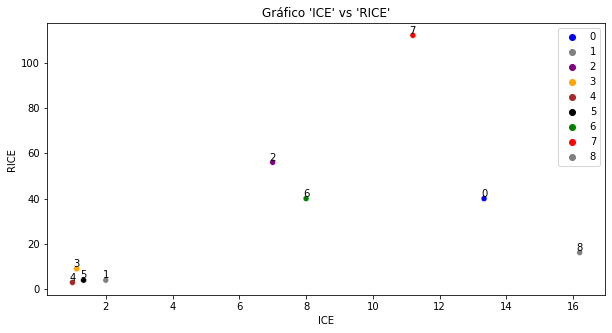

In [14]:
# Creamos un gráfico de scatter para observar mejor el comportamiento de 'ICE' y 'RICE'
f, ax = plt.subplots(figsize=(10, 5))
colores=['blue','gray','purple','orange','brown','black','green','red','gray']
sns.scatterplot(data=hypothesis, x='ice', y='rice', hue=hypothesis.index, palette=colores)

# Agregar etiquetas arriba de cada punto
for i, row in hypothesis.iterrows():
    ax.annotate(row.name, (row['ice'], row['rice']), ha='center', va='bottom')

plt.title("Gráfico 'ICE' vs 'RICE'")
plt.xlabel('ICE')
plt.ylabel('RICE')
plt.show()

**Conclusión intermedia.**
- obtuvimos el ICE y el RICE de cada una de las hipótesis, logramos identificar que:
- Segú el ICE las hipótesis mas resaltantes son la 8, 0, y 7 siendo la 8 la hipótesis mas prometedora.
- Según el RICE las hipótesis mas resaltantes son las 7, 2 y la 0 siendo la hipótesis 7 la mas prometedora.
- Y podemos notar que con ambas la 7 y la 0 son las que estan entre las primeras.

## Segunda parte.<a id='2'></a>

### Análisis de test A/B<a id='ab'></a>

In [15]:
# revisaremos si la lista de clientes son unicos por grupo.
clientes_a = orders[orders['group'] == 'A']['visitorid'].unique()
clientes_a.shape

(503,)

In [16]:
# revisaremos si la lista de clientes son unicos por grupo.
clientes_b = orders[orders['group'] == 'B']['visitorid'].unique()
clientes_b.shape

(586,)

In [17]:
df1 = set(clientes_a)
df2 = set(clientes_b)
df3 = df1 & df2
lista_clientesab = list(df3)
print(f'Hay {len(lista_clientesab)} usuarios que aparecen en ambos grupos.')

Hay 58 usuarios que aparecen en ambos grupos.


In [18]:
# verifiquemos que esos usuarios aparecen en ambos grupos.
orders[orders['visitorid'].isin(lista_clientesab)].sort_values('visitorid').head(10)

,transactionid,visitorid,date,revenue,group
703,4293855558,8300375,2019-08-07,30.5,A
71,3679129301,8300375,2019-08-01,165.7,B
823,2971973105,199603092,2019-08-27,45.9,A
246,437656952,199603092,2019-08-02,55.7,B
26,2223239646,199603092,2019-08-15,55.7,A
134,62794304,199603092,2019-08-22,110.3,A
1102,1941707234,199603092,2019-08-12,100.0,A
1009,2670069237,232979603,2019-08-31,45.6,B
1013,83566152,232979603,2019-08-31,5.9,A
590,3702128013,237748145,2019-08-20,20.8,A


In [19]:
# veamos cuantas compras fueron realizadas por estos usuarios
orders[orders['visitorid'].isin(lista_clientesab)].shape

(181, 5)

In [20]:
# creamos un set de datos de las compras sin las compras realizadas por los usuarios pertenecientes a ambos grupos
orders_ab = orders[~orders['visitorid'].isin(lista_clientesab)].copy()
#revisamos el tamaño del dataframe creado
orders_ab.shape

(1016, 5)


- Tenemos 181 compras realizadas por los 58 usuarios que aparecen en ambos grupos. Vamos a eliminar estas compras realizadas por estos usuarios para que los resultados de la prueba A/B sean válidos."

### Ingreso acumulado por grupo.<a id='iag'></a>

In [21]:
# creamos una matriz con valores únicos de parejas fecha-grupo
date_group = orders_ab[['date', 'group']].drop_duplicates()

In [22]:
# obtenemos los ingresos diarios acumulados\n",
orders_agg = date_group.apply(lambda x: orders_ab[np.logical_and(orders_ab['date'] <= x['date'], orders_ab['group'] == x['group'])]\
                                      .agg({'date':'max', 'group':'max', 'transactionid':pd.Series.nunique, 'visitorid':pd.Series.nunique, 'revenue':'sum'}), axis=1)\
                                      .sort_values(by=['date','group'])
orders_agg.columns=['date', 'group', 'orders', 'buyers', 'revenue']

In [23]:
# obtenemos las visitas diarias acumuladas
visits_agg = date_group.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]\
                              .agg({'date':'max', 'group':'max', 'visits':'sum'}), axis=1)\
                              .sort_values(by=['date','group'])
visits_agg.columns=['date','group','visits']

In [24]:
# fusionamos los ingresos acumulados con la tabla de visitas.
total_acumulativo = orders_agg.merge(visits_agg, on=['date','group'])
total_acumulativo.sample()

,date,group,orders,buyers,revenue,visits
34,2019-08-18,A,278,264,29735.7,11127


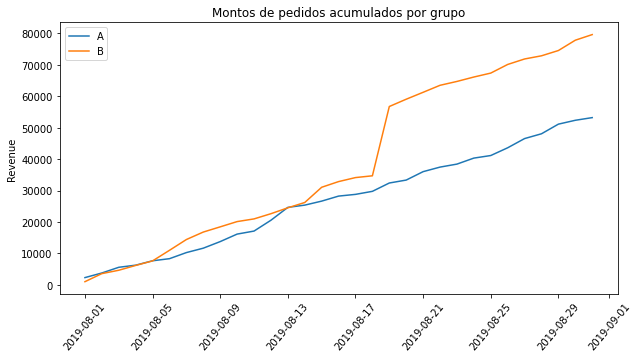

In [25]:
# Creamos el gráfico del monto de pedidos acumulados por grupo.

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
acumulativo_a = total_acumulativo[total_acumulativo['group']=='A'][['date','revenue', 'orders']]

#DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B\n",
acumulativo_b = total_acumulativo[total_acumulativo['group']=='B'][['date','revenue', 'orders']]


plt.subplots(figsize=(10,5))
plt.plot(acumulativo_a['date'], acumulativo_a['revenue'], label='A')
plt.plot(acumulativo_b['date'], acumulativo_b['revenue'], label='B')
plt.title('Montos de pedidos acumulados por grupo')
plt.ylabel('Revenue')
plt.xticks(rotation=50)
plt.legend()
plt.show()

**Conclusión intermedia.**
- Podemos notar en nuestro grafico que los ingresos del grupo B tuvieron una alza en las fechas del 18 de agosto, que nos puede indicar una subida de precio significativa.
- también nos puede indicar que sea un resultado de un valor extremo.
- el grupo A se ha mantenido estable desde la misma fecha 18 de agosto 

### Tamaño de pedido promedio acumulado por grupo<a id='tma'></a>

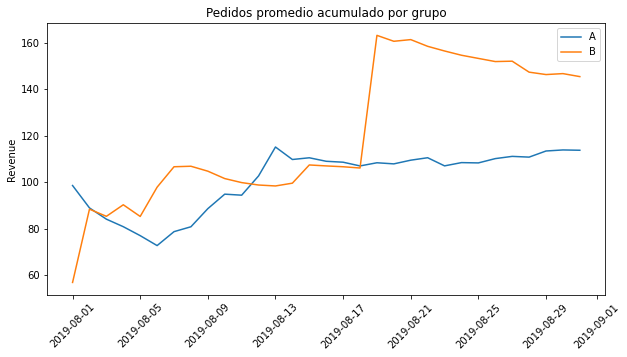

In [26]:
# Creamos el gráfico del monto promedio por grupo.
plt.subplots(figsize=(10,5))
plt.plot(acumulativo_a['date'], acumulativo_a['revenue'] / acumulativo_a['orders'], label='A')
plt.plot(acumulativo_b['date'], acumulativo_b['revenue'] / acumulativo_b['orders'], label='B')
plt.title('Pedidos promedio acumulado por grupo')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Conclusión intermedia.**
- notamos en el gráfico que el grupo B tuvo un cambio drastico en las fecha pasada el 17 de agosto y posteriormente volvió a decrecer, lo que puede ser un indicativo de que hubo pedidos muy caros en esa fecha
- también nos puede indicar que sea un resultado de un valor extremo.
- Para el grupo A el tamaño promedio se estabilizó a esas fechas. El tamaño de compra promedio para el grupo B continúa sin estabilizarse por lo que se necesitan más datos para encontrar ese tamaño y establecer su nivel.

### Diferencias relativas en el tamaño de pedido promedio acumulado entre los grupos.<a id='dta'></a>

In [27]:
# uniremos la dos tablas de acumulativos por grupo.
merge_acumulativo_ab = acumulativo_a.merge(acumulativo_b, on='date', how='left', suffixes=['A', 'B'])
merge_acumulativo_ab.head(1)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17


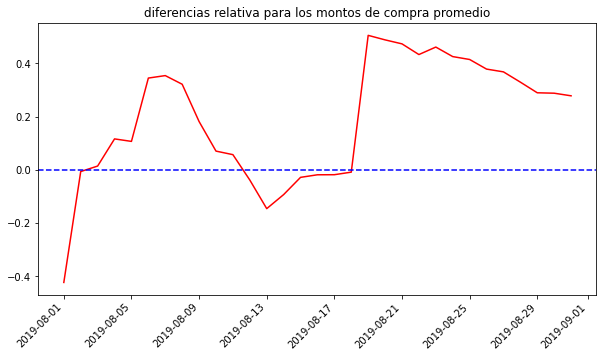

In [28]:
# Creamos el gráfico de diferencia relativa para los montos de compra promedio.
plt.subplots(figsize=(10,5))
plt.plot(merge_acumulativo_ab['date'], (merge_acumulativo_ab['revenueB'] / merge_acumulativo_ab['ordersB'])\
         /(merge_acumulativo_ab['revenueA'] / merge_acumulativo_ab['ordersA']) -1, color='red')
plt.title('diferencias relativa para los montos de compra promedio')

# agregamos una línea horizontal en y=0
plt.axhline(y=0, color='blue', linestyle='--')
plt.xticks(rotation=45,ha='right')
plt.show()

### Tasa de conversión. <a id='ts'></a>

In [29]:
# calculamos la tasa de conversión acumulada para cada grupo\n",
total_acumulativo['conversion'] = total_acumulativo['orders'] / total_acumulativo['visits']
total_acumulativo.head(1)

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989


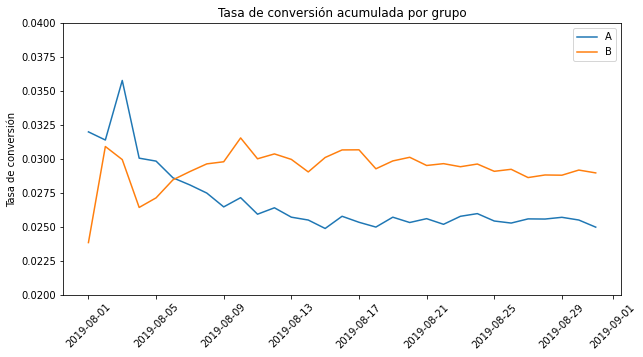

In [30]:
# Creamos el gráfico de tasa de conversión acumulada por grupo.
# seleccionamos datos en el grupo A
acumulativo_a = total_acumulativo[total_acumulativo['group']=='A']

# seleccionamos datos en el grupo B
acumulativo_b = total_acumulativo[total_acumulativo['group']=='B']

plt.subplots(figsize=(10,5))

# trazar los gráficos
plt.plot(acumulativo_a['date'], acumulativo_a['conversion'], label='A')
plt.plot(acumulativo_b['date'], acumulativo_b['conversion'], label='B')
plt.title('Tasa de conversión acumulada por grupo')
plt.legend()
plt.ylabel('Tasa de conversión')
plt.ylim( 0.02, 0.04)
plt.xticks(rotation=45)
plt.show()

- Observamos fluctuaciones en la tasa de conversión acumulada para ambos grupos. Posiblemente como consecuencia de que haya días con demasiadas ordenes de compra. La tasa de conversión para ambos grupos parece estabilizarse.

### Diferencia relativa para las tasas de conversión acumuladas<a id='dra'></a>

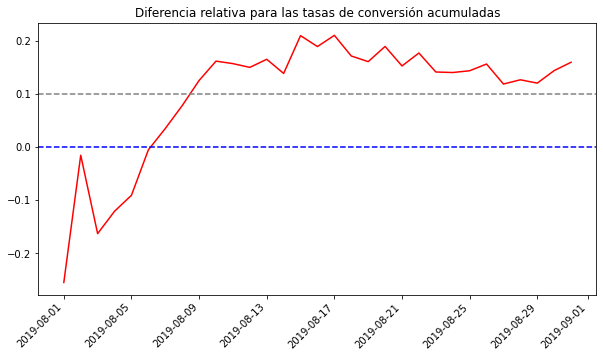

In [31]:
# Creamos un gráfico para la diferencia relativa para las tasas de conversión acumuladas.
acumulativo_conv = acumulativo_a[['date','conversion']].merge(acumulativo_b[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])
plt.subplots(figsize=(10,5))
plt.plot(acumulativo_conv['date'], acumulativo_conv['conversionB'] / acumulativo_conv['conversionA'] - 1, color='r')
plt.title('Diferencia relativa para las tasas de conversión acumuladas')
plt.axhline(y=0, color='blue', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation=45,ha='right')
plt.show()

### Dispersión del número de pedidos por usuario.<a id='dpa'></a>

In [32]:
# calculamos el número de pedidos por usuario
orders_user = orders_ab.groupby('visitorid', as_index=False).agg(orders=('transactionid','nunique'))
orders_user.head(1)

,visitorid,orders
0,5114589,1


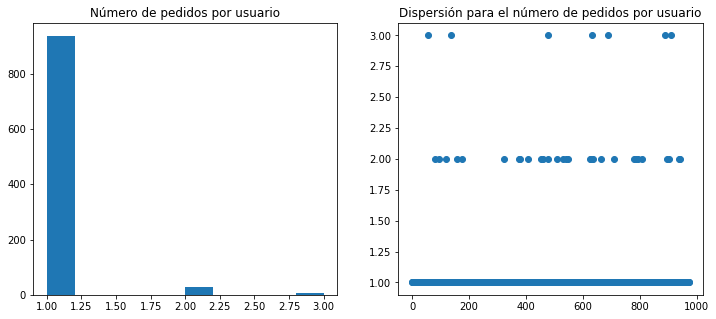

In [33]:
# Creamos el histograma y el gráfico de dispersión para el número de pedidos por usuario
x_values = pd.Series(range(0,len(orders_user)))
fig,(ax1,ax2) = plt.subplots(1, 2, figsize= (12,5))
ax1.set_title('Número de pedidos por usuario')
ax1 = orders_user['orders'].hist(ax = ax1, grid=False)
ax2.set_title('Dispersión para el número de pedidos por usuario')
ax2 = plt.scatter(x_values, orders_user['orders'])
plt.show()

- La mayoría de los usuarios realizan un solo pedido. Una parte significativa hizo de dos a tres pedidos cada uno.

In [34]:
# calculamos los percentiles para el número de pedidos por usuario
print(np.percentile(orders_user['orders'], [95, 99]))

[1. 2.]


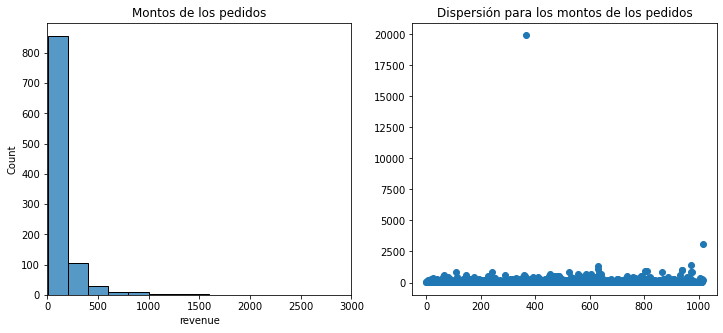

In [35]:
# Creamos el histograma y el gráfico de dispersión para los montos de los pedidos
x_values = pd.Series(range(0, orders_ab.shape[0]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12,5))
ax1. set_title('Montos de los pedidos')
ax1.set_xlim(0,3000)
ax1 = sns.histplot(orders_ab['revenue'], bins=100, ax= ax1)
ax2.set_title('Dispersión para los montos de los pedidos')
ax2 = plt.scatter(x_values, orders_ab['revenue'])
plt.show()

In [36]:
# mostramos los percentiles de los montos de los pedidos
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


In [37]:
orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

- No más del 5% de los pedidos suman un monto de 435.54 y no más del 1% son superiores a 900.904. Vamos a establecer 435 como el límite del monto de un pedido y filtraremos las anomalías en base a ello.
- El gráfico nos permite observar claramente que existen valores extremos en **revenue**.

### Significancia estadística de la diferencia entre los grupos utilizando los datos en bruto. <a id='sed'></a>

**Supuestos en la prueba U de Mann-Whitney:**
1. La variable dependiente debe medirse a nivel ordinal o continuo.
2. La variable independiente debe consistir en dos grupos.
3. Debe haber independencia de las observaciones de cada grupo.

- Esto significa que no hay relación entre las observaciones de cada grupo o entre los propios grupos. Por ejemplo, debe haber diferentes participantes en cada grupo y ningún participante debe estar en más de un grupo. 
1. Las dos variables se distribuyen de forma anormal.
- La prueba U de Mann-Whitney puede utilizarse cuando las dos variables no se distribuyen de forma regular.

**Probaremos la hipótesis nula:**
  - H0: Las medias de la cantidad de compras en los grupos A y B son iguales
  - Ha: Las medias de la cantidad de compras en los grupos A y B no son iguales

In [38]:
# creamos un dataframe para el grupo 'A' conteniendo los pedidos por usuario
orders_users_a = orders_ab[orders_ab['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
orders_users_a.columns = ['visitorid', 'orders']

In [39]:
# para los usuarios que no hicieron pedidos tendrán un cero
# creamos la muestra para el grupo 'A'
sample_a = pd.concat([orders_users_a['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()\
                                                                             - len(orders_users_a['orders'])), name='orders')],axis=0)

In [40]:
# creamos un dataframe para el grupo 'B' conteniendo los pedidos por usuario
orders_users_b = orders_ab[orders_ab['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
orders_users_b.columns = ['visitorid', 'orders']

In [41]:
orders_users_b['orders'].value_counts()

1    510
2     16
3      2
Name: orders, dtype: int64

In [42]:
# para los usuarios que no hicieron pedidos tendrán un cero
#creamos la muestra para el grupo 'B'
sample_b = pd.concat([orders_users_b['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()\
                                                                             - len(orders_users_b['orders'])), name='orders')],axis=0)

In [43]:
# aplicare la prueba de Mann-Whitney a las muestras, redondeamos a tres decimales
# usaremos alfa=0.05
print("{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))
print("{0:.1%}".format(sample_b.mean() / sample_a.mean()-1))

0.011
16.0%


In [44]:
alpha = .05

results = st.mannwhitneyu(sample_a, sample_b)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótesis nula rechazada: la diferencia es estadísticamente significativa")
else:
    print("No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia") 


p-value:  0.011018084110014696
Hipótesis nula rechazada: la diferencia es estadísticamente significativa


**Conclusión intermedia.**
- según los datos sin procesar, no hay diferencia entre los grupos A y B, por lo que no hay motivo para rechazar la hipótesis nula y concluir que el monto promedio de los pedidos difiere entre los grupos.
- El p-value= 0.937 es mayor al alfa, entonces no podemos rechazar la hipótesis nula ya que no hay diferencia estadísticamente significativa entre los grupos.
- La diferencia entre los segmentos es casi del 28% a favor del grupo 'B'

### Significancia estadística de la diferencia en promedio de pedidos entre los grupos utilizando los datos en bruto<a id='sep'></a>

In [45]:
# creamos un set de datos para el monto de los pedidos en el grupo 'A'
orders_rev_a = orders_ab[orders_ab['group']=='A']['revenue']

# creamos un set de datos para el monto de los pedidos en el grupo 'B'
orders_rev_b = orders_ab[orders_ab['group']=='B']['revenue']

- Probaremos la hipótesis nula:
    - H0: Las medias de los montos de las compras en los grupos A y B son iguales
    - Ha: Las medias de los montos de las compras en los grupos A y B no son iguales

In [46]:
# aplicare la prueba de Mann-Whitney a las muestras, redondeamos a tres decimales
# usaremos alfa=0.05
print("{0:.3f}".format(st.mannwhitneyu(orders_rev_a, orders_rev_b)[1]))
print("{0:.1%}".format(orders_rev_b.mean() / orders_rev_a.mean()-1))

0.862
27.8%


In [47]:
alpha = .05

results = st.mannwhitneyu(orders_rev_a, orders_rev_b)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótesis nula rechazada: la diferencia es estadísticamente significativa")
else:
    print("No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia") 

p-value:  0.8622329690015668
No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia


**conclusión intermedia**
- según los datos sin procesar, no hay diferencia entre los grupos A y B, por lo que no hay motivo para rechazar la hipótesis nula y concluir que el monto promedio de los pedidos difiere entre los grupos.
- El p-value = 0.862 es mayor al alfa = 0.05, entonces no podemos rechazar la hipótesis nula ya que no hay diferencia estadísticamente significativa entre los grupos.
- La diferencia entre los segmentos es casi del 28% a favor del grupo 'B'.

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados<a id='sedc'></a>


In [48]:
# creamos un dataframe con los usuarios que hayan realizado más de dos pedidos en ambos grupos\n",
users_orders = pd.concat([orders_users_a[orders_users_a['orders'] > 2]['visitorid'],\
                          orders_users_b[orders_users_b['orders'] > 2]['visitorid']], axis = 0)

In [49]:
# creamos un dataframe con los usuarios que hayan hecho compras por un monto mayor a $435
users_with_orders = orders[orders['revenue'] > 435]['visitorid']

In [50]:
# fusionamos para crear una sola lista de los usuarios anómalos\n",
anormalia_users = pd.concat([users_orders, users_with_orders], axis = 0).drop_duplicates().sort_values()

In [51]:
# obtenemos la cantidad total de usuarios anómalos
anormalia_users.shape

(65,)

In [52]:
# creamos la muestra filtrada para el grupo 'A'
sample_filt_a = pd.concat([orders_users_a[np.logical_not(orders_users_a['visitorid'].isin(anormalia_users))]['orders'],\
                           pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()\
                                                        - len(orders_users_a['orders'])), name='orders')], axis=0)

In [53]:
# creamos la muestra filtrada para el grupo 'B'
sample_filt_b = pd.concat([orders_users_b[np.logical_not(orders_users_b['visitorid'].isin(anormalia_users))]['orders'],\
                           pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()\
                                                        - len(orders_users_b['orders'])), name='orders')], axis=0)

- Probaremos la hipótesis nula:
    - H0: Las medias de la cantidad de compras en los grupos A y B son iguales
    - Ha: Las medias de la cantidad de compras en los grupos A y B no son iguales

In [54]:
# aplicare la prueba de Mann-Whitney a las muestras, redondeamos a tres decimales
# usaremos alfa=0.05
print("{0:.3f}".format(st.mannwhitneyu(sample_filt_a, sample_filt_b)[1]))
print("{0:.1%}".format(sample_filt_b.mean() / sample_filt_a.mean()-1))

0.010
18.6%


In [55]:
alpha = .05

results = st.mannwhitneyu(sample_filt_a, sample_filt_b)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótesis nula rechazada: la diferencia es estadísticamente significativa")
else:
    print("No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia") 

p-value:  0.010342947401360054
Hipótesis nula rechazada: la diferencia es estadísticamente significativa


**conclusion intermedia** 
- según los datos filtrados, hay diferencia entre los grupos A y B, por lo que podemos rechazar la hipótesis nula y concluir que la cantidad promedio de compras difiere entre los grupos.
- El p-value = 0.010 es menor al alfa = 0.05, entonces podemos rechazar la hipótesis nula ya que al parecer hay diferencia estadísticamente significativa entre los grupos.
- La diferencia entre los segmentos es casi del 19% a favor del grupo 'B'.

### Significancia estadística de la diferencia en el promedio de pedido entre los grupos utilizando los datos filtrados<a id='sedpp'></a>

In [56]:
# creamos el dataframe filtrado para el grupo 'A'
orders_rev_filt_a = orders_ab[np.logical_and(orders_ab['group']=='A',\
                                             np.logical_not(orders_ab['visitorid'].isin(anormalia_users)))]['revenue']

In [57]:
# creamos el dataframe filtrado para el grupo 'B'
orders_rev_filt_b = orders_ab[np.logical_and(orders_ab['group']=='B',\
                                             np.logical_not(orders_ab['visitorid'].isin(anormalia_users)))]['revenue']

- Probaremos la hipótesis nula:
    - H0: Las medias de los montos de las compras en los grupos A y B son iguales
    - HA: Las medias de los montos de las compras en los grupos A y B no son iguales

In [58]:
# aplicare la prueba de Mann-Whitney a l:as muestras, redondeamos a tres decimales
# usaremos alfa=0.05
print("{0:.3f}".format(st.mannwhitneyu(orders_rev_filt_a, orders_rev_filt_b)[1]))
print("{0:.1%}".format(orders_rev_filt_b.mean() / orders_rev_filt_a.mean()-1))

0.758
-3.1%


In [59]:
alpha = .05

results = st.mannwhitneyu(orders_rev_filt_a, orders_rev_filt_b)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótesis nula rechazada: la diferencia es estadísticamente significativa")
else:
    print("No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia") 

p-value:  0.7581450424941646
No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia


**Conclusión intermedia**
- según los datos filtrados, no hay diferencia entre los grupos A y B, por lo que no hay motivo para rechazar la hipótesis nula y concluir que el monto promedio de los pedidos difiere entre los grupos.
- El p-value = 0.758 es mayor al alfa = 0.05, entonces no podemos rechazar la hipótesis nula ya que no hay diferencia estadísticamente significativa entre los grupos.
- La diferencia entre los segmentos pasó de casi 28% a favor del grupo 'B' al 3% a favor del grupo 'A'.

## Conclusiones:<a id='cc'></a>
- Hasta el momento, los análisis realizados han mostrado diferencias significativas entre los grupos para la cantidad promedio de compras realizadas.
- El grupo 'B' muestra mejor desempeño que el grupo 'A', con un 19% a favor del grupo 'B'.
- Observando el gráfico de tasa de conversión acumulada por grupo, podemos notar que aún no se estabilizan esas tasas de conversión por lo que, se recomienda continuar la prueba y seguir monitoreando las tasas de conversión.